In [2]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts.Communities import spectral_communities

## Modularity Communities (40 pts) 

We will analyze modularity based communities in a Twitter user's following network.

In [3]:
#filename of follower network
fname_following = "data/friends_network_realDonaldTrump.pickle"
G = nx.read_gpickle(fname_following)


#### Calculate the modularity based communities for the network. 




In [4]:
Comm = nx_comm.greedy_modularity_communities(G.to_undirected())
# now change into dataframe
C = [] # list of community index
V = [] # list of screen names
for count,comm in enumerate(Comm):
    for v in comm:
        C.append(count)
        V.append(v)
        
df_mod = pd.DataFrame({'screen_name':V, 'community':C})
df_mod.head()

ncomm_mod = len(df_mod.community.unique())
print(f"{ncomm_mod} modularity communities")


3 modularity communities


In [5]:
#create dataframes with the size of each community using groupby and count.
df_mod_size = df_mod.groupby(by='community',as_index=False).count()

df_mod_size.rename(columns={"screen_name": "size"},inplace = True)
size_min = df_mod_size["size"].min()
size_max =  df_mod_size["size"].max()
size_mean =  df_mod_size["size"].mean()

print(f"Minimum community size = {size_min}")
print(f"Maximum community size = {size_max}")
print(f"Mean community size = {size_mean}")

Minimum community size = 3
Maximum community size = 28
Mean community size = 15.333333333333334


#### Make a bar plot of the size of each community.  

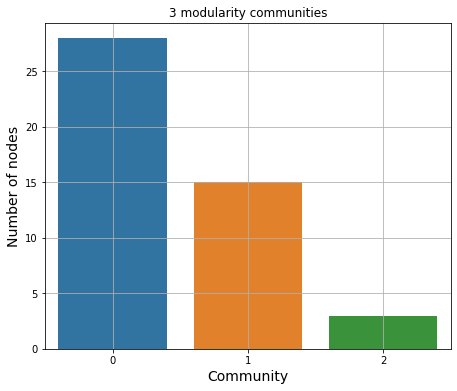

In [7]:
#plot modularity community sizes
fig = plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
ax = sns.barplot(data=df_mod_size, x="community", y = "size")
plt.xlabel("Community", fontsize = 14)
plt.ylabel("Number of nodes", fontsize = 14)
plt.title(f"{ncomm_mod} modularity communities")
plt.grid()


#### Draw the network with nodes 

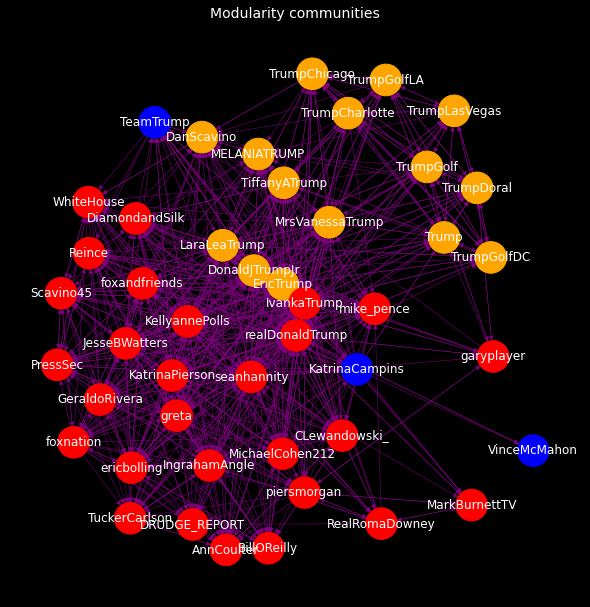

In [15]:
Colors = ['red', 'orange', 'blue']
node_color_mod = [Colors[df_mod.community[df_mod.screen_name==node].values[0]] for node in G.nodes()]
pos = nx.kamada_kawai_layout(G)  #position of each node in the network

edge_color = 'purple'
background_color = 'black'
edge_width = .5
node_size = 1000

   
#Draw the network, with labels    
fig = plt.figure(figsize=(8,8))
nx.draw(G, pos, node_color = node_color_mod, width= edge_width,edge_color=edge_color,node_size=node_size,
       with_labels=True,font_color = 'white')
fig.set_facecolor(background_color)
plt.title("Modularity communities",color = 'white',fontsize = 14)
plt.show()




## Spectral Clustering

Next, we will apply spectral clustering to find communities in the network.  To pick the number of communities, we will use modularity.

#filename of follower network
fname_following = "data/friends_network_realDonaldTrump.pickle"
G = nx.read_gpickle(fname_following)

#### Calculate spectral clustering communities for each value of k between 2 and 10.  Plot the modularity of each set of communities versus k.  For which value of k is the modularity the highest?

k=2, modularity = 0.102
k=3, modularity = 0.106
k=4, modularity = 0.101
k=5, modularity = 0.106
k=6, modularity = 0.076
k=7, modularity = 0.096
k=8, modularity = 0.052
k=9, modularity = 0.059
k=10, modularity = 0.065


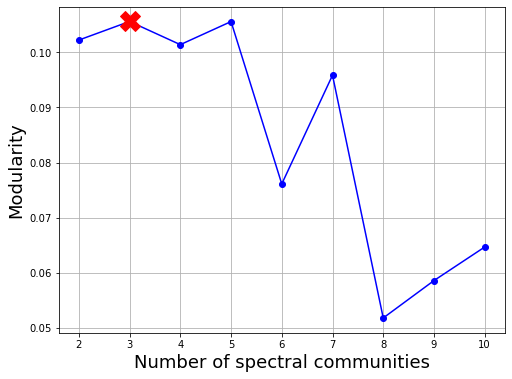

the highest value of k is the modularity = 3, modularity = 0.11


In [4]:
K = np.arange(2,11,1)
Mod = []
kbest = 0
mod_best = -1e10
for k in K:
    df_community = spectral_communities(G,k)  #find spectral communities
    #create list of lists of community members
    C = []
    for community_index in df_community.community.unique():
        community = df_community.screen_name[df_community.community==community_index].tolist()
        C.append(community)
    mod = nx_comm.modularity(G, C)  #calculate modularity of communities
    Mod.append(mod)
 
    print(f"k={k}, modularity = {mod:.3f}")

    #keep track of the best modularity and corresponding k
    if mod>mod_best:
        mod_best = mod
        kbest = k
#plot the mod
fig = plt.figure(figsize = (8,6))
plt.plot(K,Mod,marker = 'o',color = 'blue')
plt.plot(kbest,mod_best,marker = 'X',color = 'red',markersize = 20)

plt.xlabel("Number of spectral communities",fontsize = 18)
plt.ylabel("Modularity",fontsize = 18)
plt.grid()
plt.show()

print(f"the highest value of k is the modularity = {kbest}, modularity = {mod_best:.2f}")

#### For the set of communities with the highest modularity, make a bar plot of the size of each community.

3 spectral communities


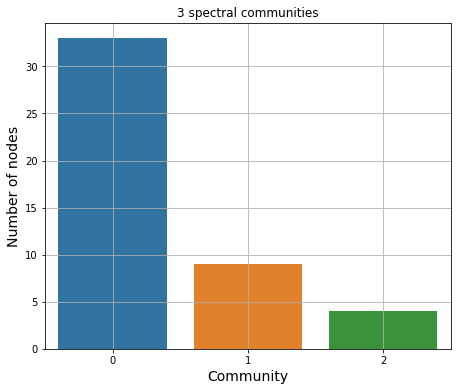

In [23]:
k = 3
df_spec = spectral_communities(G,k)

ncomm_spec = len(df_spec.community.unique())
print(f"{ncomm_spec} spectral communities")
#create dataframes with the size of each community using groupby and count.
df_spec_size = df_spec.groupby(by='community',as_index=False).count()

df_spec_size.rename(columns={"screen_name": "size"},inplace = True)

#plot spectral community sizes
fig = plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
ax = sns.barplot(data=df_spec_size, x="community", y = "size")
plt.xlabel("Community", fontsize = 14)
plt.ylabel("Number of nodes", fontsize = 14)
plt.title(f"{ncomm_spec} spectral communities")
plt.grid()
plt.show()


#### Calculate the betweenness centrality of each node in the network.

In [26]:
G = G.to_directed()  #make sure G is a directed network

BC = nx.betweenness_centrality(G)

dictionary_list = []
for screen_name in BC.keys():
    row = {'screen_name':screen_name,
          'betweenness_centrality':BC[screen_name]
}
    dictionary_list.append(row)
df_centrality = pd.DataFrame(dictionary_list)
df_centrality.head()


,screen_name,betweenness_centrality
0,Trump,0.003111
1,EricTrump,0.065791
2,TrumpCharlotte,0.002085
3,IvankaTrump,0.070677
4,TrumpGolfDC,0.000551


In [27]:
#merge df_spec with df_centrality into one super dataframe
df = df_spec.merge(df_centrality, left_on='screen_name', right_on='screen_name')
df.head(5)

,screen_name,community,betweenness_centrality
0,Trump,1,0.003111
1,EricTrump,0,0.065791
2,TrumpCharlotte,1,0.002085
3,IvankaTrump,0,0.070677
4,TrumpGolfDC,1,0.000551


#### Draw the network with nodes colored based on their spectral clustering community membership. Use the value of k that has the highest modularity.

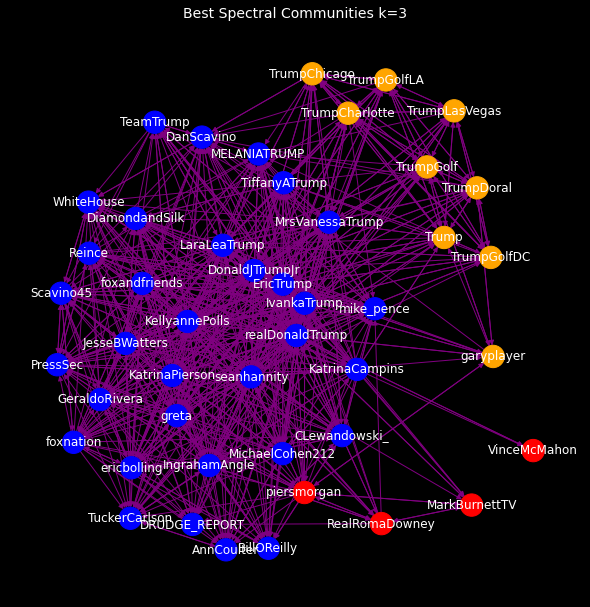

In [31]:
df_spec_best = spectral_communities(G,kbest)
Colors = ['red', 'orange', 'blue']
node_color = [Colors[df_spec_best.community[df_spec_best.screen_name==node].values[0]] for node in G.nodes()]

edge_color = 'purple'
background_color = 'black'
edge_width = 1
node_size = 500

   
#Draw the network, with labels    
fig = plt.figure(figsize=(8,8))
nx.draw(G, pos, node_color = node_color, width= edge_width,edge_color=edge_color,node_size=node_size,
       with_labels=True,font_color = 'white')
fig.set_facecolor(background_color)
plt.title(f"Best Spectral Communities k={kbest}",color = 'white',fontsize = 14)
plt.show()